## Import Dependencies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuration


In [16]:
plt.style.use('ggplot')
sns.set_palette("Set2")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [17]:
# Load data
df = pd.read_csv('../data/MachineLearningRating_v3.csv', parse_dates=['TransactionMonth'])

print(df.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\2364488055.py:2: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.csv', parse_dates=['TransactionMonth'])


  UnderwrittenCoverID  PolicyID TransactionMonth IsVATRegistered Citizenship  \
0              145249 12827.000       2015-03-01            True               
1              145249 12827.000       2015-05-01            True               
2              145249 12827.000       2015-07-01            True               
3              145255 12827.000       2015-05-01            True               
4              145255 12827.000       2015-07-01            True               

           LegalType Title Language                 Bank      AccountType  \
0  Close Corporation    Mr  English  First National Bank  Current account   
1  Close Corporation    Mr  English  First National Bank  Current account   
2  Close Corporation    Mr  English  First National Bank  Current account   
3  Close Corporation    Mr  English  First National Bank  Current account   
4  Close Corporation    Mr  English  First National Bank  Current account   

   ...                    ExcessSelected CoverCategory  

# Outlier Detection:

In [18]:
# Data Quality Assessment
print("=== DATA QUALITY REPORT ===")
print(f"Shape: {df.shape}")
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))
print("\nData Types:")
print(df.dtypes)

=== DATA QUALITY REPORT ===
Shape: (1000098, 52)

Missing Values:
NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          785435
Rebuilt                      650982
Converted                    650982
WrittenOff                   650982
NewVehicle                   179269
Bank                         168236
AccountType                   65451
Gender                        36252
MaritalStatus                 34975
VehicleType                   27268
make                          27268
mmcode                        27268
Model                         27268
Cylinders                     27268
bodytype                      27268
kilowatts                     27268
NumberOfDoors                 27268
VehicleIntroDate              27268
cubiccapacity                 27268
CapitalOutstanding            26718
AlarmImmobiliser              26716
SubCrestaZone                 26716
Province                      26716
Country                       2671

# Data Cleaning

In [19]:
# Data Cleaning
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']


In [20]:
# Descriptive Statistics
print("\n=== DESCRIPTIVE STATISTICS ===")
print(df.describe(include='all').T)


=== DESCRIPTIVE STATISTICS ===
                              count  unique  \
UnderwrittenCoverID         1000098  149298   
PolicyID                 973382.000     NaN   
TransactionMonth             973382     NaN   
IsVATRegistered              973382       2   
Citizenship                  973382       4   
LegalType                    973382       6   
Title                        973382       5   
Language                     973382       1   
Bank                         831862      11   
AccountType                  934647       3   
MaritalStatus                965123       3   
Gender                       963846       3   
Country                      973382       1   
Province                     973382       9   
PostalCode               973382.000     NaN   
MainCrestaZone               973382      13   
SubCrestaZone                973382      36   
ItemType                     973382       1   
mmcode                   972830.000     NaN   
VehicleType                 

c:\Users\Administrator\Desktop\10 Acadamy\week3\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


# 1. Loss Ratio Analysis

In [21]:
# 1. Loss Ratio Analysis
def calculate_loss_ratio(group):
    total_claims = group['TotalClaims'].sum()
    total_premium = group['TotalPremium'].sum()
    return total_claims / total_premium if total_premium > 0 else np.nan

loss_ratio_by_province = df.groupby('Province').apply(calculate_loss_ratio)
loss_ratio_by_vehicle = df.groupby('VehicleType').apply(calculate_loss_ratio)
loss_ratio_by_gender = df.groupby('Gender').apply(calculate_loss_ratio)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\1033665239.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(calculate_loss_ratio)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\1033665239.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_vehicle = df.groupby('VehicleType').apply(calculate_loss_ratio)
C:\Users\Administrator\App

# 2. Temporal Analysis

In [22]:
# 2. Temporal Analysis
monthly_claims = df.resample('M', on='TransactionMonth')['TotalClaims'].sum()
monthly_premiums = df.resample('M', on='TransactionMonth')['TotalPremium'].sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\528254029.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_claims = df.resample('M', on='TransactionMonth')['TotalClaims'].sum()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6564\528254029.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_premiums = df.resample('M', on='TransactionMonth')['TotalPremium'].sum()


# 3. Vehicle Make Analysis

In [23]:
# 3. Vehicle Make Analysis
make_analysis = df.groupby('make').agg(
    AvgClaim=('TotalClaims', 'mean'),
    Frequency=('PolicyID', 'count')
).sort_values('AvgClaim', ascending=False)

# Distribution of Cover Types by Region

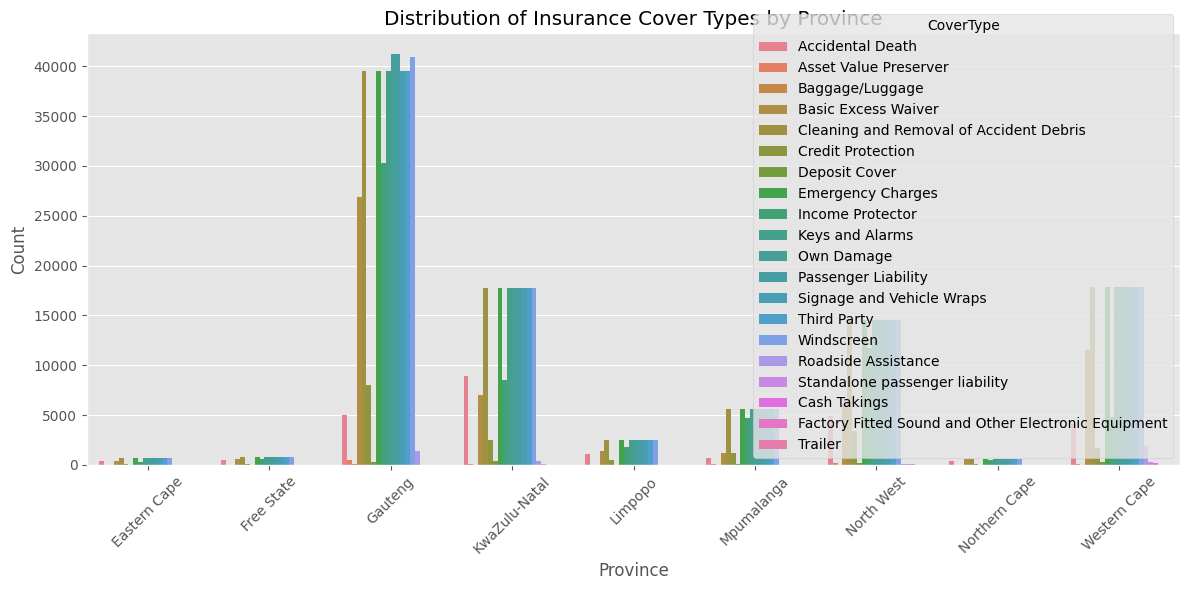

In [24]:
plt.figure(figsize=(12, 6))
cover_counts = df.groupby(['Province', 'CoverType']).size().reset_index(name='Count')
sns.barplot(data=cover_counts, x='Province', y='Count', hue='CoverType')
plt.title("Distribution of Insurance Cover Types by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cover_type_by_province.png")
plt.show()


To perform Bivariate or Multivariate Analysis focused on exploring relationships between monthly changes in TotalPremium and TotalClaims by PostalCode

In [11]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [ ]:
# Convert date to datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Drop rows with missing zip or transaction date
df = df.dropna(subset=['TransactionMonth', 'PostalCode'])

# Group by PostalCode and TransactionMonth
monthly_agg = df.groupby([pd.Grouper(key='TransactionMonth', freq='M'), 'PostalCode']).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()

# ----- Plot 1: Scatter Plot -----
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=monthly_agg,
    x='TotalPremium', 
    y='TotalClaims',
    hue='PostalCode', 
    palette='tab10',
    alpha=0.7
)
plt.title("Monthly TotalPremium vs TotalClaims by PostalCode")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("plot_bivariate_scatter_by_zipcode.png")
plt.show()

# ----- Plot 2: Correlation Matrix -----
# Pivoting data so each ZipCode is a feature (if needed)
corr_data = monthly_agg.pivot_table(index='TransactionMonth', 
                                    columns='PostalCode', 
                                    values='TotalClaims')

# Fill missing months with 0
corr_data = corr_data.fillna(0)

# Calculate correlation
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of TotalClaims across PostalCode")
plt.tight_layout()
plt.savefig("plot_corr_matrix_claims_by_zipcode.png")
plt.show()

# Visualization 1: Loss Ratio by Category

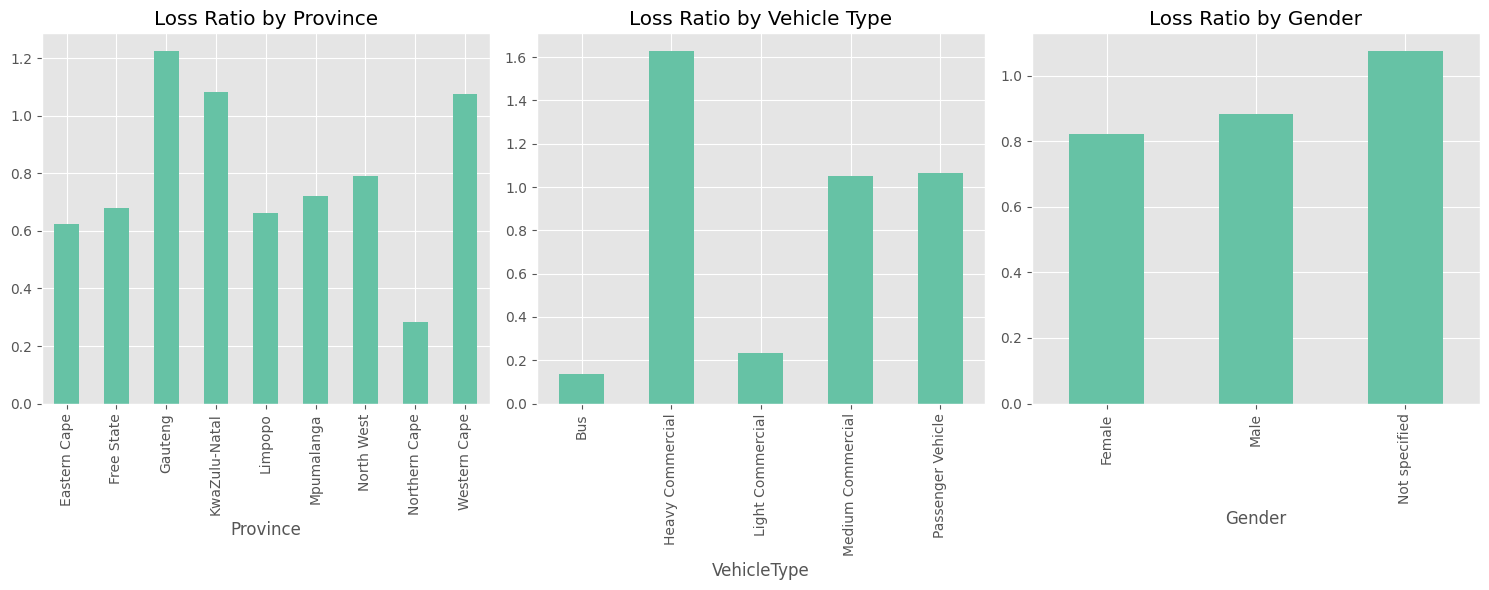

In [23]:
# Visualization 1: Loss Ratio by Category
plt.figure(figsize=(15, 6))
plt.subplot(131)
loss_ratio_by_province.plot(kind='bar', title='Loss Ratio by Province')
plt.subplot(132)
loss_ratio_by_vehicle.plot(kind='bar', title='Loss Ratio by Vehicle Type')
plt.subplot(133)
loss_ratio_by_gender.plot(kind='bar', title='Loss Ratio by Gender')
plt.tight_layout()
plt.show()
plt.savefig('loss_ratios.png', dpi=300)
plt.close()

# Visualization 2: Temporal Trends

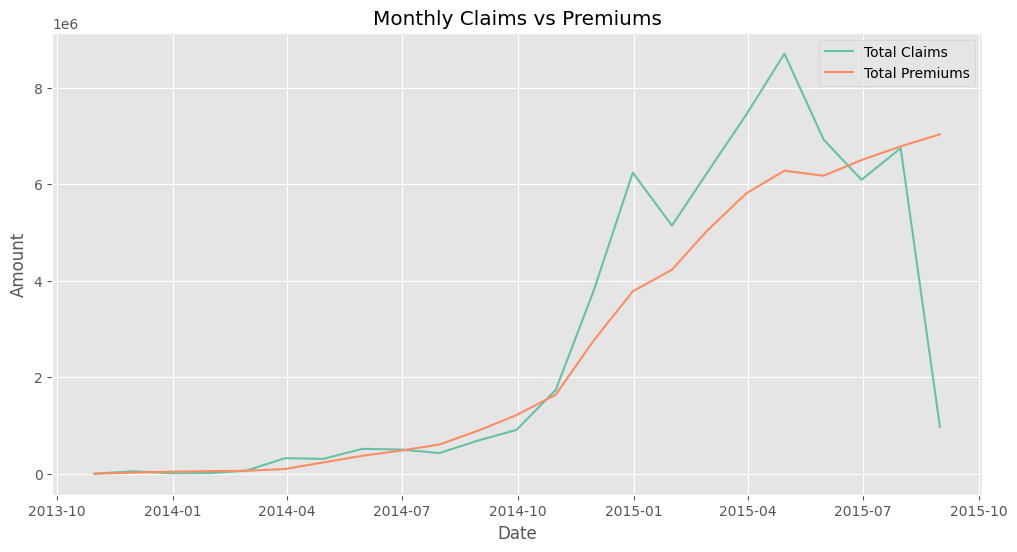

In [22]:
# Visualization 2: Temporal Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_claims.index, monthly_claims, label='Total Claims')
plt.plot(monthly_premiums.index, monthly_premiums, label='Total Premiums')
plt.title('Monthly Claims vs Premiums')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()
plt.savefig('temporal_trends.png', dpi=300)
plt.close()

# Visualization 3: Vehicle Make Analysis

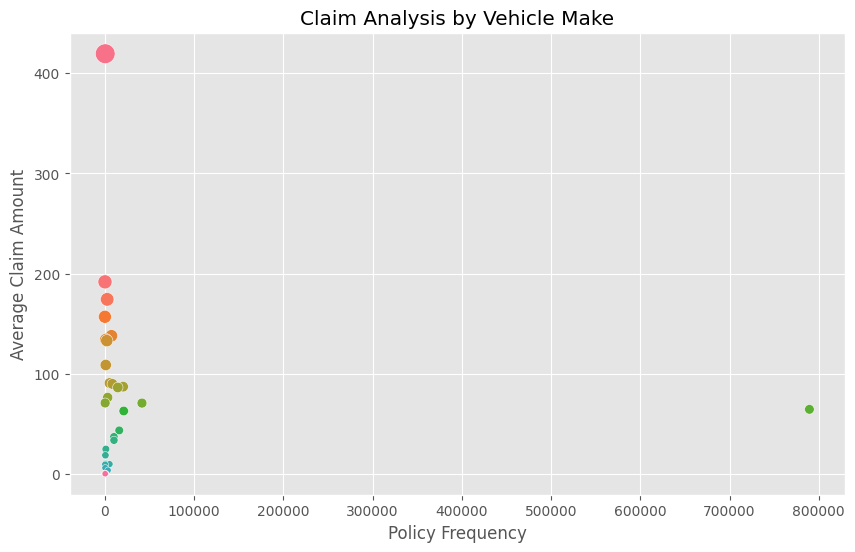

In [21]:
# Visualization 3: Vehicle Make Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Frequency', 
    y='AvgClaim', 
    size='AvgClaim',
    sizes=(20, 200),
    hue=make_analysis.index,
    data=make_analysis,
    legend=False
)
plt.title('Claim Analysis by Vehicle Make')
plt.xlabel('Policy Frequency')
plt.ylabel('Average Claim Amount')
plt.annotate('High Risk', xy=(1, 700), color='red', fontsize=12)
plt.show()
plt.savefig('vehicle_risk.png', dpi=300, bbox_inches='tight')
plt.close()

# Visualization 4: Outlier Detection

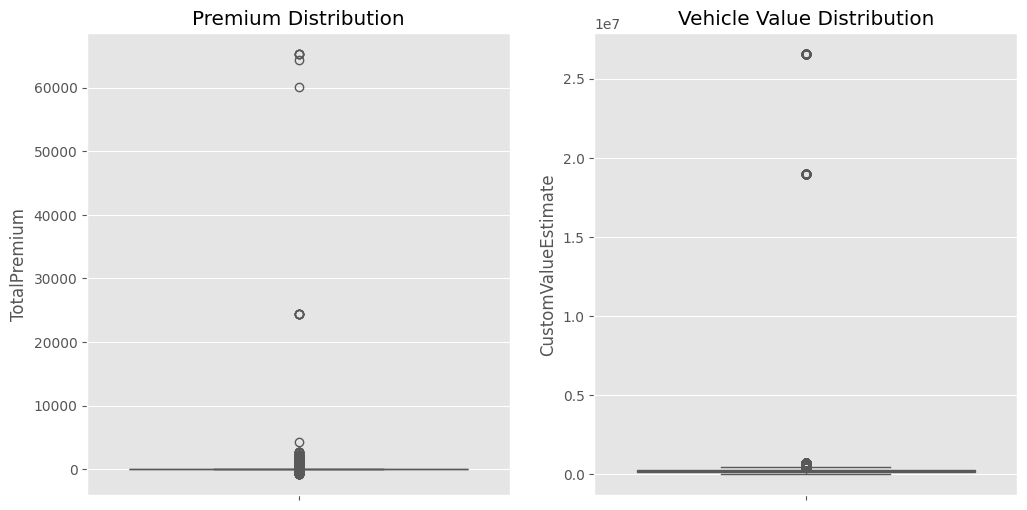

In [20]:
# Visualization 4: Outlier Detection
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.boxplot(y='TotalPremium', data=df)
plt.title('Premium Distribution')
plt.subplot(122)
sns.boxplot(y='CustomValueEstimate', data=df)
plt.title('Vehicle Value Distribution')
plt.show()
plt.savefig('outliers.png', dpi=300)
plt.close()

# Visualization 5: Geographical Distribution

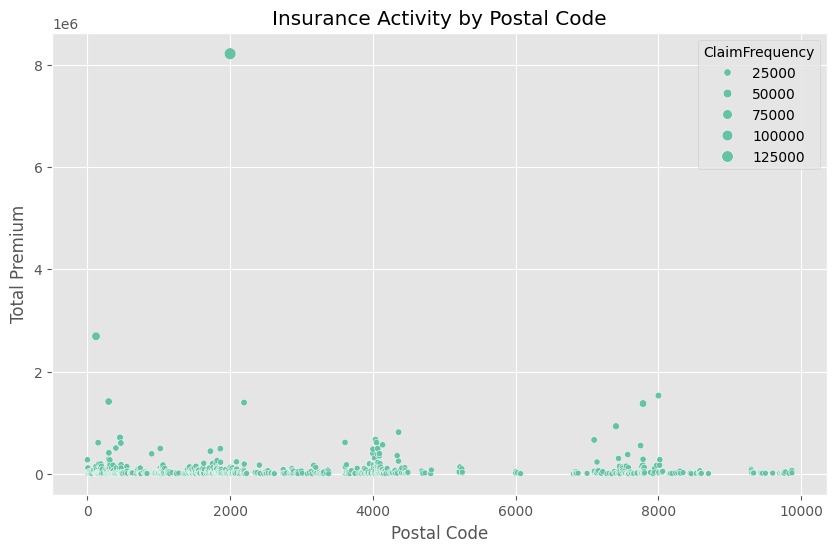

In [19]:
# Visualization 5: Geographical Distribution
plt.figure(figsize=(10, 6))
geo_data = df.groupby('PostalCode').agg(
    PremiumDensity=('TotalPremium', 'sum'),
    ClaimFrequency=('TotalClaims', 'count')
).reset_index()
sns.scatterplot(
    x='PostalCode', 
    y='PremiumDensity', 
    size='ClaimFrequency',
    data=geo_data
)
plt.title('Insurance Activity by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Total Premium')
plt.show()
plt.savefig('geographical_distribution.png', dpi=300)
plt.close()

# Output key insights

In [16]:
# Output key insights
print("\n=== KEY INSIGHTS ===")
print(f"Overall Portfolio Loss Ratio: {calculate_loss_ratio(df):.2%}")
print(f"\nHighest Risk Vehicle Type: {loss_ratio_by_vehicle.idxmax()} ({loss_ratio_by_vehicle.max():.2%})")
print(f"Highest Claim Vehicle Make: {make_analysis['AvgClaim'].idxmax()} (R{make_analysis['AvgClaim'].max():,.2f})")
print(f"Most Active Region: Postal Code {geo_data.loc[geo_data['PremiumDensity'].idxmax(), 'PostalCode']}")


=== KEY INSIGHTS ===
Overall Portfolio Loss Ratio: 106.23%

Highest Risk Vehicle Type: Heavy Commercial (162.84%)
Highest Claim Vehicle Make: SUZUKI                              (R419.63)
Most Active Region: Postal Code 2000.0
